## Import the libraries needed

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

## Loading our dataset

In [32]:
df = pd.read_csv('final.csv')
len(df)

38411

In [33]:
df.head()

,Unnamed: 0,name,endTime,artistName,trackName,msPlayed,datetime,danceability,energy,key,...,type,id,uri,track_href,analysis_url,duration_ms,time_signature,albumName,albumID,preference
0,0,Johnny Cash___Wage War,7/12/2022 5:34,Wage War,Johnny Cash,232413,7/12/2022 5:34,0.490,0.615,4,...,audio_features,4sBOU30e7J2KF2VzBwDG2M,spotify:track:4sBOU30e7J2KF2VzBwDG2M,https://api.spotify.com/v1/tracks/4sBOU30e7J2K...,https://api.spotify.com/v1/audio-analysis/4sBO...,216000,4,Johnny Cash (Stripped),0NBqAEzV88JB497CabtJCn,1
1,1,Seven Hills___While She Sleeps,7/12/2022 5:37,While She Sleeps,Seven Hills,262546,7/12/2022 5:37,0.457,0.968,5,...,audio_features,7cBkZ5cBvMUrHoCtsoDotj,spotify:track:7cBkZ5cBvMUrHoCtsoDotj,https://api.spotify.com/v1/tracks/7cBkZ5cBvMUr...,https://api.spotify.com/v1/audio-analysis/7cBk...,262547,4,This Is The Six (Deluxe),5WYyxZVi03JrSvwOr9LgCW,1
2,2,Engine 45___The Ghost Inside,7/12/2022 5:41,The Ghost Inside,Engine 45,252155,7/12/2022 5:41,0.493,0.948,10,...,audio_features,70SkWedrjKzDgKrqHZwAf4,spotify:track:70SkWedrjKzDgKrqHZwAf4,https://api.spotify.com/v1/tracks/70SkWedrjKzD...,https://api.spotify.com/v1/audio-analysis/70Sk...,252155,4,Get What You Give,3r2Tup1FQ1xiDr78Q7s71v,1
3,3,Impermanence___Architects,7/12/2022 5:45,Architects,Impermanence,242356,7/12/2022 5:45,0.374,0.895,8,...,audio_features,3p7qbTzPf4jKeEEwy765sI,spotify:track:3p7qbTzPf4jKeEEwy765sI,https://api.spotify.com/v1/tracks/3p7qbTzPf4jK...,https://api.spotify.com/v1/audio-analysis/3p7q...,242356,4,For Those That Wish To Exist,7qemUq4n71awwVPOaX7jw4,1
4,4,Square Hammer___Ghost,7/12/2022 5:48,Ghost,Square Hammer,239293,7/12/2022 5:48,0.530,0.903,2,...,audio_features,2XgTw2co6xv95TmKpMcL70,spotify:track:2XgTw2co6xv95TmKpMcL70,https://api.spotify.com/v1/tracks/2XgTw2co6xv9...,https://api.spotify.com/v1/audio-analysis/2XgT...,239293,4,Meliora (Deluxe Edition),3bChCUtpRC1NaCLYD4unbD,1


## Data pre-processing

Make key and mode into categorical values

In [34]:
df['key'] = df['key'].astype('category')

In [35]:
df['mode'] = df['mode'].astype('category')

Drop extra columns (by keeping the columns we want)

In [36]:
df = df[['danceability', 'energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo', 'preference']]
# preference col can be used for other analysis
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,preference
0,0.490,0.615,4,-7.878,0,0.0286,0.386000,0.00000,0.0814,0.110,109.985,1
1,0.457,0.968,5,-4.350,0,0.0611,0.000029,0.00004,0.3490,0.335,109.993,1
2,0.493,0.948,10,-4.180,0,0.0964,0.000296,0.00000,0.2670,0.482,146.526,1
3,0.374,0.895,8,-4.073,1,0.0752,0.000212,0.00000,0.0289,0.417,174.062,1
4,0.530,0.903,2,-4.396,0,0.0483,0.000033,0.18200,0.2590,0.747,129.983,1


Remove duplicates from the dataset

In [37]:
df = df.drop_duplicates()

len(df)

2096

Split data into features and target variable. Although, in this case, we will not be using our target variable

In [38]:
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

Define a scaling function for numpy arrays. This function makes sure that our numeric values have a mean of 0 and a standard deviation of 1.

In [39]:
def scale_features(X):
    for i in range(X.shape[1]):
        col = X[:, i]
        if np.issubdtype(col.dtype, np.number):  # check if the column is numeric
            col = col.astype(float)
            X[:, i] = (col - col.mean()) / col.std()  # scale the column

Apply the scaling function to X

In [40]:
scale_features(X)

X[:5]

array([[-1.54539842, -0.36789965, -1.16672957, -1.17550763, -0.99316163,
         2.101069  , -0.39415732, -0.86054052, -1.20865614, -0.60260913],
       [ 0.61896586, -0.08251191,  0.30385234, -1.17550763, -0.5102549 ,
        -0.32870098, -0.39397911,  0.67121196, -0.16736312, -0.60235376],
       [ 0.49633899,  1.34442677,  0.37471372, -1.17550763,  0.0142561 ,
        -0.32701765, -0.39415732,  0.20184087,  0.51294832,  0.56384484],
       [ 0.17137778,  0.7736513 ,  0.4193147 ,  0.85069631, -0.30074768,
        -0.32754644, -0.39415732, -1.1610525 ,  0.21213033,  1.44284314],
       [ 0.22042853, -0.93867512,  0.28467809, -1.17550763, -0.70044586,
        -0.32867266,  0.42282961,  0.15604857,  1.73936009,  0.03576274]])

Perform PCA with 2 components

In [41]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

Create a scatter plot of the feature vectors

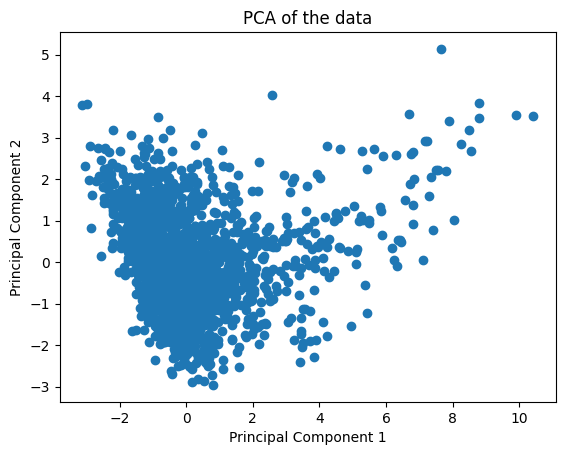

In [42]:
plt.scatter(principal_components[:, 0], principal_components[:, 1])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of the data")
plt.show()

Get the principal axes in feature space

In [43]:
feature_vectors = pca.components_.T

Set scaling factor for feature vectors

In [44]:
scale_factor = 4

Plot the feature vectors

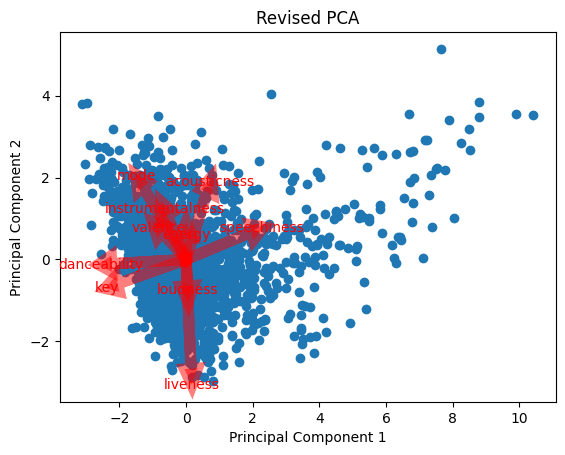

In [45]:
plt.scatter(principal_components[:, 0], principal_components[:, 1])
for i, feature_vector in enumerate(feature_vectors):
    plt.arrow(0, 0, feature_vector[0]*scale_factor, feature_vector[1]*scale_factor, 
              color='r', alpha=0.5, linewidth=2*scale_factor, 
              head_width=0.1*scale_factor, head_length=0.1*scale_factor)
    plt.text(feature_vector[0]*scale_factor*1.15, feature_vector[1]*scale_factor*1.15, 
             df.columns[:-1][i], color='r', ha='center', va='center')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title('Revised PCA')    
plt.show()

In [ ]:
# plt.savefig('pca.png')